In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
from matplotlib import pyplot as plt

5

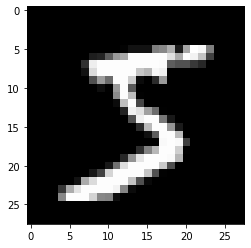

In [4]:
plt.imshow(x_train[0],cmap='gray')
y_train[0]

0

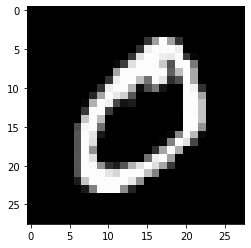

In [5]:
plt.imshow(x_train[1],cmap='gray')
y_train[1]

In [6]:
import pandas as pd

In [7]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# flattening the images
x_train_flattened = x_train.reshape(-1, 28*28)
x_test_flattened = x_test.reshape(-1, 28*28)


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
x_train_flattened.shape

(60000, 784)

In [12]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_dim=28*28, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # for binary classification, we use keras.layers.Dense(1, activation='sigmoid')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # for binary classification, we use loss='binary_crossentropy'

In [15]:
model.fit(x_train_flattened, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 3ms/step - loss: 0.2731 - accuracy: 0.9203 - val_loss: 0.1344 - val_accuracy: 0.9581
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1162 - accuracy: 0.9646 - val_loss: 0.1209 - val_accuracy: 0.9623
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0806 - accuracy: 0.9748 - val_loss: 0.0990 - val_accuracy: 0.9707
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0599 - accuracy: 0.9816 - val_loss: 0.0985 - val_accuracy: 0.9707
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9838 - val_loss: 0.0890 - val_accuracy: 0.9740
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.0934 - val_accuracy: 0.9738
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.1021 - val_accuracy:

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
y_test_pred = model.predict(x_test_flattened)

In [18]:
print(classification_report(y_test.argmax(axis=1), y_test_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [19]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1)))

,0,1,2,3,4,5,6,7,8,9
0,964,1,3,0,0,2,5,1,3,1
1,0,1128,1,2,0,0,1,1,2,0
2,1,0,1010,3,0,0,2,7,8,1
3,0,0,3,986,0,4,0,5,9,3
4,0,2,1,2,959,0,9,2,2,5
5,2,0,0,12,1,865,2,0,6,4
6,1,2,0,1,3,4,946,0,1,0
7,1,1,5,1,1,0,0,1012,3,4
8,0,0,5,3,0,5,3,7,948,3
9,1,6,0,4,8,1,1,9,1,978


In [21]:
# preparing the images for the CNN

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [23]:
cnn_model = keras.Sequential()
cnn_model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(10, activation='softmax')) # for binary classification, we use keras.layers.Dense(1, activation='sigmoid')

In [24]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [25]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # for binary classification, we use loss='binary_crossentropy'

In [26]:
cnn_model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 37s 5ms/step - loss: 0.2364 - accuracy: 0.9323 - val_loss: 0.1001 - val_accuracy: 0.9725
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0888 - accuracy: 0.9746 - val_loss: 0.0752 - val_accuracy: 0.9790
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0668 - accuracy: 0.9809 - val_loss: 0.0756 - val_accuracy: 0.9769
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0554 - accuracy: 0.9835 - val_loss: 0.0718 - val_accuracy: 0.9793
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0466 - accuracy: 0.9861 - val_loss: 0.0775 - val_accuracy: 0.9784
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0680 - val_accuracy: 0.9789
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0704 - val_accuracy

In [27]:
y_test_pred_cnn = cnn_model.predict(x_test)

In [28]:
print(classification_report(y_test.argmax(axis=1), y_test_pred_cnn.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [29]:
pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), y_test_pred_cnn.argmax(axis=1)))

,0,1,2,3,4,5,6,7,8,9
0,970,0,2,1,0,2,2,0,2,1
1,0,1127,3,2,0,0,1,1,1,0
2,4,3,1014,1,1,0,1,5,2,1
3,0,0,1,1001,0,4,0,0,3,1
4,1,1,1,0,967,0,2,1,0,9
5,1,1,2,8,0,874,4,0,1,1
6,7,2,0,0,3,4,939,0,3,0
7,1,2,12,2,1,0,0,1004,1,5
8,8,0,3,5,0,1,1,5,946,5
9,1,1,0,5,8,2,0,6,0,986
